# Assignment 1. Data Exploration

In [1]:
# import essential packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Problem 1. Summary statistics

Using the Titanic dataset (located in `./data/titianic.csv`), identify the following:

1. mean and median of `Age`?
2. mean and median of `Passenger Fare`?
3. the number of missing values in the `Age` and `Passenger Fare` columns?

Note: round to the nearest integer.

In [2]:
# your code here
# ...

In [3]:
df = pd.read_csv('./data/titanic.csv')

print('mean and median of age:', np.around(df['Age'].mean()), np.around(df['Age'].median()))
print('mean and median of fare:', np.around(df['Passenger Fare'].mean()), np.around(df['Passenger Fare'].median()))
print('the number of missing values in age: {:,}'.format(df['Age'].isna().sum()))
print('the number of missing values in fare: {:,}'.format(df['Passenger Fare'].isna().sum()))

# or,

print('\nmean and median of age: {:.0f}, {:.0f}'.format(df['Age'].mean(), df['Age'].median()))
print('mean and median of fare: {:.0f}, {:.0f}'.format(df['Passenger Fare'].mean(), df['Passenger Fare'].median()))
print('the number of missing values in age: {:,}'.format(df['Age'].isna().sum()))
print('the number of missing values in fare: {:,}'.format(df['Passenger Fare'].isna().sum()))

# or, 
# ...

mean and median of age: 30.0 28.0
mean and median of fare: 33.0 14.0
the number of missing values in age: 263
the number of missing values in fare: 1

mean and median of age: 30, 28
mean and median of fare: 33, 14
the number of missing values in age: 263
the number of missing values in fare: 1


## Problem 2. Join and GroupBy

Suppose you want to concatenate two datasets, `exercise1_boxA.csv` and `exercise1_boxB.csv` (both located in `./data/`).

In [4]:
df_a = pd.read_csv('./data/exercise1_boxA.csv')
df_a

,ProductCode,Weight_gram,Membership,Price
0,CS001,547,YES,26800
1,CS002,836,NO,17700
2,CS004,506,YES,19900
3,CS006,766,YES,18200
4,CS008,871,NO,8300
5,CS009,361,NO,14300
6,CS010,375,YES,6900
7,CS012,804,NO,22500
8,CS013,386,YES,11500
9,CS014,847,YES,18100


In [5]:
df_b = pd.read_csv('./data/exercise1_boxB.csv')
df_b

,ProductCode,Weight_gram,Membership
0,CS001,547,YES
1,CS003,441,NO
2,CS005,229,YES
3,CS006,766,YES
4,CS007,634,NO
5,CS009,361,NO
6,CS010,375,YES
7,CS011,527,NO
8,CS013,386,YES
9,CS015,728,NO


However, you realized that the `price` column is missing in `exercise1_boxB` dataframe!

The price info of all products can be found in `exercise1_price.csv`.

In [6]:
df_p = pd.read_csv('./data/exercise1_price.csv')
df_p

,ProductCode,Price
0,CS010,6900
1,CS008,8300
2,CS013,11500
3,CS009,14300
4,CS002,17700
5,CS006,18200
6,CS007,20700
7,CS015,22300
8,CS012,22500
9,CS003,23400


#### 1. Add the `price` column to `exercise1_boxB` using the `exercise1_price` table.


In [7]:
df_b = pd.merge(df_b, df_p, how='left')
df_b

,ProductCode,Weight_gram,Membership,Price
0,CS001,547,YES,26800
1,CS003,441,NO,23400
2,CS005,229,YES,24000
3,CS006,766,YES,18200
4,CS007,634,NO,20700
5,CS009,361,NO,14300
6,CS010,375,YES,6900
7,CS011,527,NO,25500
8,CS013,386,YES,11500
9,CS015,728,NO,22300


#### 2. Concatenate the two tables, `exercise1_boxA.csv` and `exercise1_box1.csv` into one table and drop duplicate rows. 

Hint: use `.drop_duplicates()` method. After that, there will be 15 rows remained.

In [8]:
df = pd.concat([df_a, df_b], axis=0)
df = df.drop_duplicates()
df

,ProductCode,Weight_gram,Membership,Price
0,CS001,547,YES,26800
1,CS002,836,NO,17700
2,CS004,506,YES,19900
3,CS006,766,YES,18200
4,CS008,871,NO,8300
5,CS009,361,NO,14300
6,CS010,375,YES,6900
7,CS012,804,NO,22500
8,CS013,386,YES,11500
9,CS014,847,YES,18100


#### 4. Find the mean and median of `Weight_gram` and `Price` grouped by `Membership`.

Hint: use `groupby()` method.

Note: Round to the nearest integer.

In [9]:
# your code here
# ...

In [10]:
# mean 
df.groupby('Membership').mean().round(0)

,Weight_gram,Price
Membership,,
NO,650.0,19338.0
YES,522.0,17914.0


In [11]:
# median
df.groupby('Membership').median().round(0)

,Weight_gram,Price
Membership,,
NO,681.0,21500.0
YES,506.0,18200.0


## Problem 3. Correlation between Sleep Time and GPA

The `exercise1_sleep_gpa.csv` (located in `./data/`) contains sleep time (`Sleep`) and GPA (`GPA`) of 20 individuals.

1. Find the correlation coefficient between the two variables (round to 2 digits).
2. Draw a scatter plot and describe the relationship between the two variables. Do they have a linear relationship? Is it week or strong?

In [12]:
# your code here
# ...

correlation between sleep time and gpa:        Sleep   GPA
Sleep   1.00  0.69
GPA     0.69  1.00


<AxesSubplot:xlabel='Sleep', ylabel='GPA'>

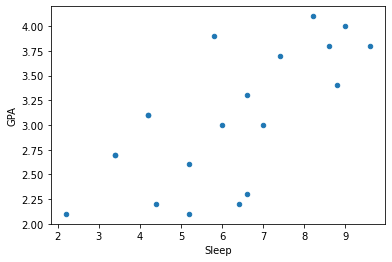

In [13]:
df = pd.read_csv('./data/exercise1_sleep_gpa.csv')
print('correlation between sleep time and gpa:', df.corr().round(2))
df.plot(kind='scatter', x='Sleep', y='GPA')

## Problem 4. Find the two most similar stocks.

`exercise1_stock.csv` (located in `./data/`) contains the daily stock prices of 4 companies for 30 consecutive days.

Find the two most similar two stocks showing similar up and down patterns and explain the why.

In [14]:
# your code here
# ...

In [15]:
df = pd.read_csv('./data/exercise1_stock.csv')
df.corr()

,Sasung,Never,Kokoa,Noxon
Sasung,1.000000,0.147962,0.976435,-0.045437
Never,0.147962,1.000000,0.094654,-0.008580
Kokoa,0.976435,0.094654,1.000000,-0.050140
Noxon,-0.045437,-0.008580,-0.050140,1.000000


array([[<AxesSubplot:xlabel='Sasung', ylabel='Sasung'>,
        <AxesSubplot:xlabel='Never', ylabel='Sasung'>,
        <AxesSubplot:xlabel='Kokoa', ylabel='Sasung'>,
        <AxesSubplot:xlabel='Noxon', ylabel='Sasung'>],
       [<AxesSubplot:xlabel='Sasung', ylabel='Never'>,
        <AxesSubplot:xlabel='Never', ylabel='Never'>,
        <AxesSubplot:xlabel='Kokoa', ylabel='Never'>,
        <AxesSubplot:xlabel='Noxon', ylabel='Never'>],
       [<AxesSubplot:xlabel='Sasung', ylabel='Kokoa'>,
        <AxesSubplot:xlabel='Never', ylabel='Kokoa'>,
        <AxesSubplot:xlabel='Kokoa', ylabel='Kokoa'>,
        <AxesSubplot:xlabel='Noxon', ylabel='Kokoa'>],
       [<AxesSubplot:xlabel='Sasung', ylabel='Noxon'>,
        <AxesSubplot:xlabel='Never', ylabel='Noxon'>,
        <AxesSubplot:xlabel='Kokoa', ylabel='Noxon'>,
        <AxesSubplot:xlabel='Noxon', ylabel='Noxon'>]], dtype=object)

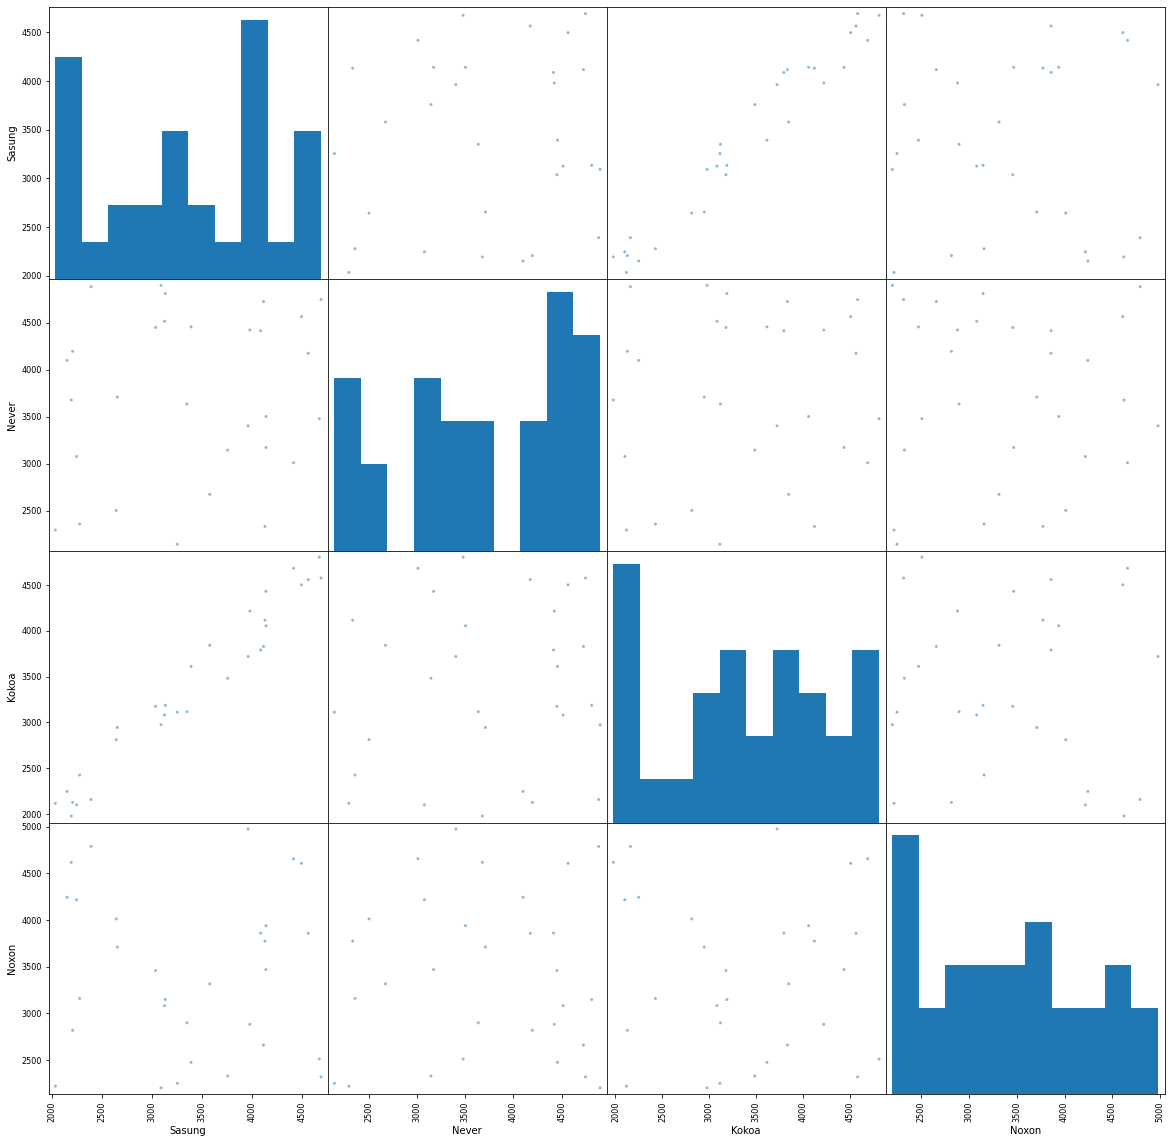

In [16]:
pd.plotting.scatter_matrix(df, figsize=(20, 20))